<a href="https://colab.research.google.com/github/miaomiaoYao/HW/blob/main/CNeuro/CNeuro_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantitative Analysis of Dendritic Morphology

## functions

In [12]:
# packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1]:
def swc_reader(filepath):
    # load the data file (.swc)
    colnames = ["segment_index", "segment_type",
                "x", "y", "z",
                "segment_diameter", "father_segment_index"]
    file = pd.read_table(filepath, sep="\s+", names=colnames, header=None)
    return file


In [10]:
def cell_visualization(filename):
    # visualize 3D cell
    x = filename["x"]
    y = filename["y"]
    z = filename["z"]

    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.scatter(x, y, z, s=1)
    ax.set_title("3d visualization of neurons")
    plt.show()

    return 0

In [19]:
def distance_dendritic_to_soma(filename):
    #compute the mean path length from a dendritic segment to the soma
    cell_body = filename[filename["segment_type"].isin([1])][["x","y","z"]]
    dendritic = filename[filename["segment_type"].isin([3])][["x","y","z"]]
    soma = cell_body.apply(np.mean, axis=1)
    distance = dendritic.apply(lambda x: (x-soma).pow(2).sum().sqrt(), axis=1)
    mean_path_length = distance.mean()
    return mean_path_length


In [24]:
file_pyramidal[file_pyramidal["segment_type"].isin([1])][["x","y","z"]]

,x,y,z
0,0.0,0.0,0.000
1,0.0,0.0,13.237


## load the data file

In [15]:
file_pyramidal = swc_reader("https://raw.githubusercontent.com/miaomiaoYao/HW/main/CNeuro/files/1%20pyramidal%20dendrite.txt")
file_purkinjie = swc_reader("https://raw.githubusercontent.com/miaomiaoYao/HW/main/CNeuro/files/2%20Purkinjie%20dendrite.txt")
file_arbor = swc_reader("https://raw.githubusercontent.com/miaomiaoYao/HW/main/CNeuro/files/3%20arbor%20from%20larval%20zebrafish.txt")

file_pyramidal.head()

,segment_index,segment_type,x,y,z,segment_diameter,father_segment_index
0,1,1,0.0,0.0,0.000,14.892,-1
1,2,1,0.0,0.0,13.237,14.892,1
2,3,3,-1.1,2.6,13.237,1.750,2
3,4,3,-2.0,4.1,13.637,1.500,3
4,5,3,-2.8,7.1,13.637,1.500,4


## plot and visualize neurons

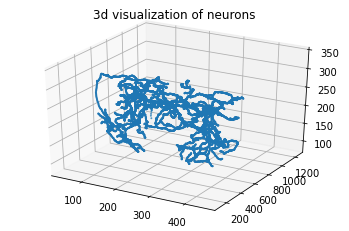

In [11]:
cell_visualization(file_arbor)

## mean path length

In [20]:
distance_dendritic_to_soma(file_pyramidal)

KeyError: ignored